# Phylogeny of Programming Languages

In [1]:
%load_ext autoreload
%autoreload 2

import json
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, Latex, clear_output

In [2]:
import sys
sys.path.insert(0, "..")

from phylo.main import code_to_markdown, markdownify

## Code Snippets


Load a collection of simple `multiply(a, b)` functions in various languages, adapted from [Rosetta Code](https://rosettacode.org/wiki/Function_definition)

In [3]:
from phylo.main import load_snippets_data, load_snippets_md

### Load data

In [4]:
data = load_snippets_data('mult')
md = load_snippets_md('mult')

### Preview data

In [5]:
data.keys()

dict_keys(['C++', 'Perl', 'C', 'Python', 'D', 'E', 'Standard ML', 'Java', 'Go', 'AppleScript', 'Elixir', 'Swift', 'C#', 'Scala', 'JavaScript', 'Clojure', 'Mathematica', 'Rust', 'Common Lisp', 'Scheme', 'PowerShell', 'Erlang', 'APL', 'PostScript', 'R', 'Prolog', 'Emacs Lisp', 'Groovy', 'Visual Basic', 'FORTRAN', 'Shell', 'Kotlin', 'Ada', 'ActionScript', 'Haskell', 'OCaml', 'F#', 'Elm', 'Visual Basic Script', 'Racket', 'Julia', 'PHP', 'Lua', 'Awk', 'Ruby', 'TypeScript', 'CoffeeScript'])

In [6]:
data['C']

'int multiply(int a, int b)\n{\n    return a * b;\n}'

In [7]:
print(data['C'])

int multiply(int a, int b)
{
    return a * b;
}


---
Uncomment to see code snippets in data / markdown form

In [8]:
# data

In [9]:
# display(Markdown(md))

## Alignment

### Needleman–Wunsch algorithm

Optimal string alignments are found using Needleman–Wunsch algorithm

See:

- [Wikipedia](https://en.wikipedia.org/wiki/Needleman%E2%80%93Wunsch_algorithm)
- [Teaching tool](http://rna.informatik.uni-freiburg.de/Teaching/index.jsp?toolName=Needleman-Wunsch)
- [Interactive tool](https://blievrouw.github.io/needleman-wunsch/)

In [10]:
from phylo.needleman_wunsch import NW

#### Example #1

##### Load strings

In [11]:
lang1 = 'C'
lang2 = 'C++'

s1 = data[lang1]
s2 = data[lang2]
markdownify(s1, lang1, show=True);
markdownify(s2, lang2, show=True);

**C**

```C
int multiply(int a, int b)
{
    return a * b;
}
```

----



**C++**

```C++
inline int multiply(int a, int b)
{
    return a * b;
}
```

----



##### Use algorithm

In [12]:
nw = NW(s1, s2, s1_name="MULT_C", s2_name="MULT_C++")
nw.solve()
print(nw.summarize())


#=======================================
#
# Aligned_sequences: 2
# Length: 55
# Identity:     48/55  (87.27 %)
# Gaps:         7/55   (12.73 %)
#
#=======================================

MULT_C  	▬▬▬▬▬▬▬int·multiply(int·a,·int·b)↵{↵····return·a·*·b;↵}
        	       ||||||||||||||||||||||||||||||||||||||||||||||||
MULT_C++	inline·int·multiply(int·a,·int·b)↵{↵····return·a·*·b;↵}



#### Example #2

In [13]:
lang1 = 'C'
lang2 = 'Python'

s1 = data[lang1]
s2 = data[lang2]

markdownify(s1, lang1, show=True);
markdownify(s2, lang2, show=True);

**C**

```C
int multiply(int a, int b)
{
    return a * b;
}
```

----



**Python**

```Python
def multiply(a, b):
    return a * b
```

----



In [14]:
nw = NW(s1, s2, s1_name="MULT_C", s2_name="MULT_PYTHON")
nw.solve()
print(nw.summarize())


#=======================================
#
# Aligned_sequences: 2
# Length: 48
# Identity:     32/48  (66.67 %)
# Gaps:         12/48  (25 %)
#
#=======================================

MULT_C     	int·multiply(int·a,·int·b)↵{↵····return·a·*·b;↵}
           	   ||||||||||    ||    |||  |||||||||||||||||   
MULT_PYTHON	def·multiply(▬▬▬▬a,▬▬▬▬·b)▬:↵····return·a·*·b▬▬▬



## Matrix

(Old code, needs to be updated)

See: https://medium.com/@bostjan_cigan/using-the-needleman-wunsch-algorithm-to-draw-evolutionary-trees-90d9db149413

In [87]:
langs = list(data.keys())
langs[:5]

['C++', 'Perl', 'C', 'Python', 'D']

In [88]:
L = len(langs)

In [89]:
scoring_matrix = np.zeros((L, L), dtype="f")

In [90]:
count = 0
for i in range(L):
    for j in range(L):
        
        # display progress
        count += 1
        progress = (count / (L * L)) * 100
        clear_output(wait=True)
        display(f"Progress: {progress:.5g}%")
        
        s1 = data[langs[i]]
        s2 = data[langs[j]]
                
        nw = NW(s1, s2)
        nw.solve()
        
        score = nw.identity_score[1]
        scoring_matrix[i, j] = score

'Progress: 1%'

In [105]:
df = pd.DataFrame(scoring_matrix, columns=langs, index=langs)
df.shape

(47, 47)

In [133]:
my_langs = [
    'C++', 'Perl', 'C', 'Python', "Java", "Go",
    "Emacs Lisp", "Racket", "R", "Julia", "Rust",
    "Haskell", "Ruby", "TypeScript", "Scheme", "Shell",
    "PowerShell", "Clojure", "OCaml", "Standard ML"
]

small_df = df.loc[my_langs, my_langs]
small_df

,C++,Perl,C,Python,Java,Go,Emacs Lisp,Racket,R,Julia,Rust,Haskell,Ruby,TypeScript,Scheme,Shell,PowerShell,Clojure,OCaml,Standard ML
C++,1.000000,0.370968,0.872727,0.600000,0.806452,0.583333,0.345455,0.428571,0.267857,0.500000,0.453125,0.272727,0.473684,0.528571,0.428571,0.459016,0.463768,0.327273,0.375000,0.339286
Perl,0.370968,1.000000,0.418182,0.456522,0.362319,0.433962,0.380952,0.348837,0.236842,0.343750,0.346939,0.378378,0.368421,0.324324,0.348837,0.558140,0.615385,0.365854,0.365854,0.405405
C,0.872727,0.418182,1.000000,0.666667,0.758065,0.648148,0.346154,0.433962,0.274510,0.508197,0.508772,0.312500,0.520000,0.537313,0.433962,0.518519,0.469697,0.333333,0.346154,0.380000
Python,0.600000,0.456522,0.666667,1.000000,0.516129,0.622222,0.500000,0.536585,0.317073,0.500000,0.509434,0.416667,0.700000,0.470588,0.536585,0.555556,0.456140,0.473684,0.425000,0.486486
Java,0.806452,0.362319,0.758065,0.516129,1.000000,0.546875,0.290323,0.365079,0.269841,0.485714,0.422535,0.241935,0.406250,0.526316,0.365079,0.426471,0.453333,0.274194,0.338710,0.317460
Go,0.583333,0.433962,0.648148,0.622222,0.546875,1.000000,0.380000,0.420000,0.276596,0.534483,0.611111,0.333333,0.500000,0.579710,0.420000,0.471698,0.476190,0.346939,0.333333,0.456522
Emacs Lisp,0.345455,0.380952,0.346154,0.500000,0.290323,0.380000,1.000000,0.764706,0.235294,0.322581,0.384615,0.515152,0.555556,0.285714,0.764706,0.382979,0.321429,0.906250,0.542857,0.676471
Racket,0.428571,0.348837,0.433962,0.536585,0.365079,0.420000,0.764706,1.000000,0.294118,0.366667,0.418182,0.411765,0.605263,0.318841,1.000000,0.354167,0.327273,0.735294,0.485714,0.500000
R,0.267857,0.236842,0.274510,0.317073,0.269841,0.276596,0.235294,0.294118,1.000000,0.254237,0.229167,0.259259,0.351351,0.220588,0.294118,0.263158,0.211538,0.218750,0.258065,0.312500
Julia,0.500000,0.343750,0.508197,0.500000,0.485714,0.533333,0.322581,0.366667,0.254237,1.000000,0.460317,0.254237,0.482759,0.739130,0.366667,0.349206,0.442857,0.275862,0.295082,0.355932


## Tree

In [152]:
from scipy.cluster.hierarchy import linkage, dendrogram
import pylab

#### All langs

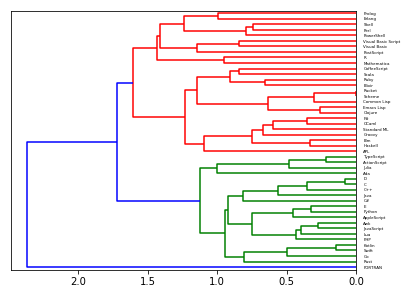

In [153]:
average = linkage(scoring_matrix, "average")
dendrogram(average, labels=langs, orientation="left", leaf_font_size=4)
pylab.subplots_adjust(bottom=0.1, left=0.2, right=1.0, top=1.0)

#### Some langs

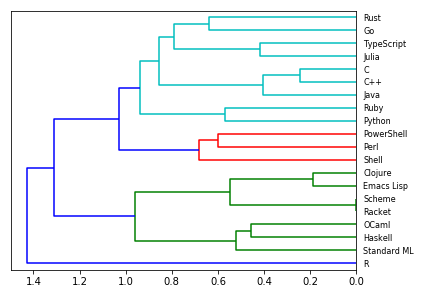

In [164]:
average = linkage(small_df, "average")
dendrogram(average, labels=my_langs, orientation="left", leaf_font_size=8)
pylab.subplots_adjust(bottom=0.1, left=0.2, right=1.0, top=1.0)

pylab.savefig('tree.png', dpi=300, bbox_inches='tight')

In [49]:

# # Calculate the distance scoring matrix
# def scoring_distance_matrix(scoring_matrix, table):
 
#     scoring_distance_matrix = create_matrix(len(scoring_matrix[0]), len(scoring_matrix[0]))
#     maxR = get_matrix_max(scoring_matrix)
 
#     for i in range(0, len(table)):
#         for j in range(0, len(table)):
#             scoring_distance_matrix[i][j] = abs(scoring_matrix[i][j] - maxR)
 
#     return scoring_distance_matrix
 
# # Return the max value in a matrix, used in 
# # scoring_distance_matrix method
# def get_matrix_max(matrix):
 
#     max_value = None
 
#     for i in range(0, len(matrix[0])):
#         for j in range(0, len(matrix[0])):
#             if(max_value == None):
#                 max_value = matrix[i][j]
#             if(matrix[i][j] >= max_value):
#                 max_value = matrix[i][j]
 
#     return max_value

# scoring_distance_matrix = scoring_distance_matrix(scoring_matrix, langs)